Running Model-5: 4500it [00:00, 7964.73it/s]<?, ?it/s]
Running Model-5: 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


Fitting node Ridge-5...


Running Model-5: 490it [00:00, 7313.08it/s]           


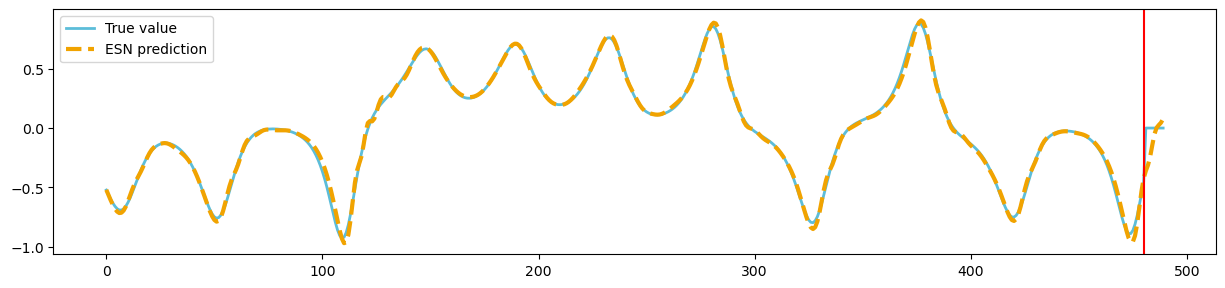

In [6]:
#Для построения архитектуры ESN использовалась библиотека reservoirPy, основанная на графовых вычислениях
import numpy as np
import matplotlib.pyplot as plt
from reservoirpy.datasets import to_forecasting # разбиение на train/test
import reservoirpy as rpy
from reservoirpy.nodes import Reservoir, Ridge #узлы резервуара и считывающего слоя
from reservoirpy.observables import nrmse, rsquare
import json
from scipy.integrate import solve_ivp

length = 5000
train = 4500
forecast = 10

###ПОДГОТОВКА ДАННЫХ
#9
import warnings
from nolitsa import data

dt = 0.01
x0 = [0.62225717, -0.08232857, 30.60845379]

#000
x1 = data.lorenz(length=6500, sample=dt, x0=x0,
               sigma=16.0, beta=4.0, rho=45.92)[1]

#11
import copy
time = copy.deepcopy(x1) 
X1 = time[:,0] 
X1 = X1.reshape(6500,1) 
X1 = 2 * (X1 - X1.min()) / (X1.max() - X1.min()) - 1 
#000
    
X = X1[:5000]
for i in range(10):
    X[-i]=0

def results(y_pred, y_test):
    fig = plt.figure(figsize=(15, 7))
    ax = plt.subplot(211)
    #ax.plot(np.arange(sample), y_test[len(y_test)-sample:], lw=2, label="True value", color="black")
    #ax.plot(np.arange(sample), y_pred[len(y_pred)-sample:], lw=3, label="ESN prediction", color="gray", linestyle="--")

    ax.plot(np.arange(len(y_test)), y_test, lw=2, label="True value", color="#5cbdd9")
    ax.plot(np.arange(len(y_pred)), y_pred, lw=3, label="ESN prediction", color="#f1a300", linestyle="--")
    ax.axvline(x=len(y_test)-forecast, color="red")  # Add vertical line
    ax.legend()
    plt.show()
    
###HERE0
from reservoirpy.datasets import to_forecasting

x, y = to_forecasting(X, forecast=forecast)

X_train1, y_train1 = x[:train], y[:train]
X_test1, y_test1 = x[train:], y[train:]

#Первый тестовый набор параметров 
units = 100
leak_rate = 0.3
spectral_radius = 1.25
input_scaling = 1.0
connectivity = 0.1
input_connectivity = 0.2
regularization = 1e-8
seed = 1234

#узел резервуара
reservoir = Reservoir(units, input_scaling=input_scaling, sr=spectral_radius,
                      lr=leak_rate, rc_connectivity=connectivity,
                      input_connectivity=input_connectivity, seed=seed)
#выходной слой(считывающее устройство)
readout = Ridge(1, ridge=regularization) # 1 - кол-во выходных нейронов
#соединяем узлы и таким образом получаем модель 
esn = reservoir >> readout

#обучение модели
esn = esn.fit(X_train1, y_train1)
#делаем предсказание
y_pred1 = esn.run(X_test1, reset=False)
results(y_pred1, X[train+forecast:])
###HERE1

In [7]:
for i in range(10):
    X[-i]=y_pred1[-i]

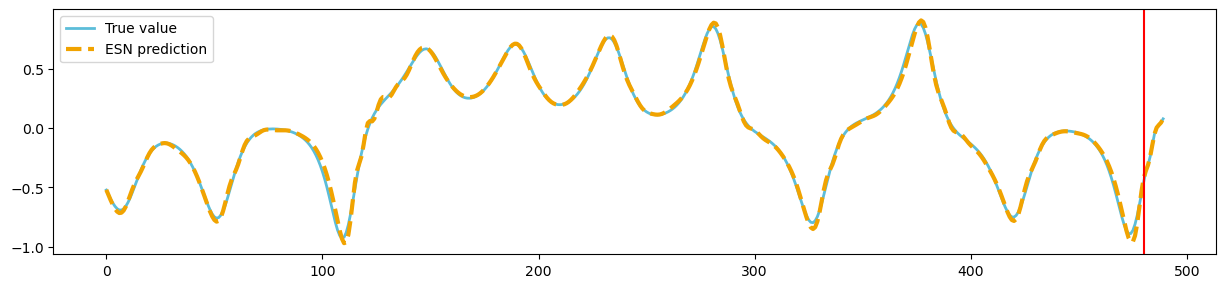

In [8]:
results(y_pred1, X[train+forecast:])

In [10]:
arr = np.zeros((10, 1), dtype=float)
X = np.concatenate([X, arr])

Running Model-8: 4500it [00:00, 8079.07it/s]<?, ?it/s]
Running Model-8: 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


Fitting node Ridge-8...


Running Model-8: 500it [00:00, 8476.18it/s]           


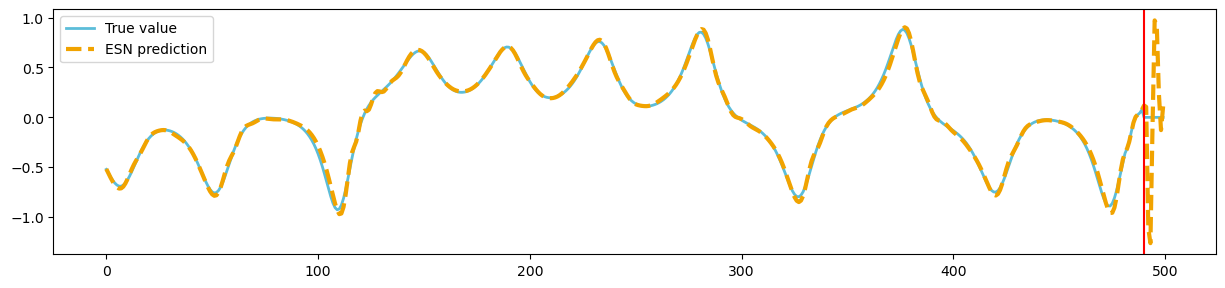

In [13]:
x, y = to_forecasting(X, forecast=forecast)

X_train1, y_train1 = x[:train], y[:train]
X_test1, y_test1 = x[train:], y[train:]

#Первый тестовый набор параметров 
units = 100
leak_rate = 0.3
spectral_radius = 1.25
input_scaling = 1.0
connectivity = 0.1
input_connectivity = 0.2
regularization = 1e-8
seed = 1234

#узел резервуара
reservoir = Reservoir(units, input_scaling=input_scaling, sr=spectral_radius,
                      lr=leak_rate, rc_connectivity=connectivity,
                      input_connectivity=input_connectivity, seed=seed)
#выходной слой(считывающее устройство)
readout = Ridge(1, ridge=regularization) # 1 - кол-во выходных нейронов
#соединяем узлы и таким образом получаем модель 
esn = reservoir >> readout

#обучение модели
esn = esn.fit(X_train1, y_train1)
#делаем предсказание
y_pred1 = esn.run(X_test1, reset=False)
results(y_pred1, X[train+forecast:])

In [14]:
X.shape

(5010, 1)

Running Model-22:   0%|          | 0/1 [00:00<?, ?it/s]

Running Model-22: 3090it [00:00, 8329.16it/s]
Running Model-22: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]


Fitting node Ridge-22...


Running Model-22: 500it [00:00, 8772.53it/s]           


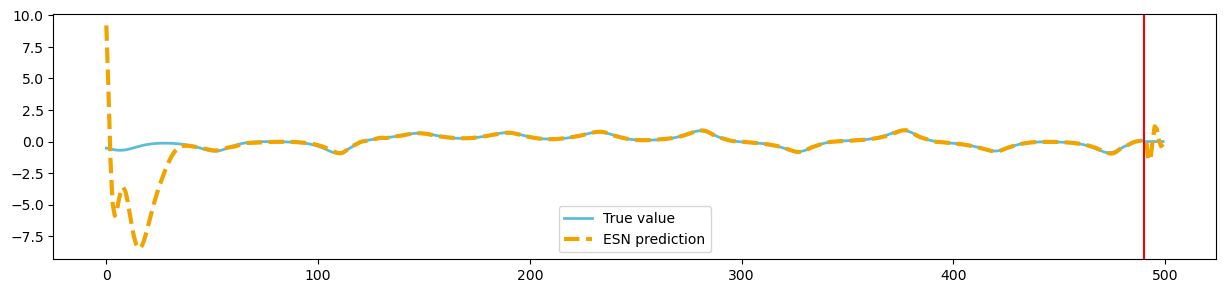

In [28]:
x, y = to_forecasting(X, forecast=forecast)

X_train1, y_train1 = x[:train], y[:train]
X_test1, y_test1 = x[train:], y[train:]

#Первый тестовый набор параметров 
units = 100
leak_rate = 0.3
spectral_radius = 1.25
input_scaling = 1.0
connectivity = 0.1
input_connectivity = 0.2
regularization = 1e-8
seed = 1234

#узел резервуара
reservoir = Reservoir(units, input_scaling=input_scaling, sr=spectral_radius,
                      lr=leak_rate, rc_connectivity=connectivity,
                      input_connectivity=input_connectivity, seed=seed)
#выходной слой(считывающее устройство)
readout = Ridge(1, ridge=regularization) # 1 - кол-во выходных нейронов
#соединяем узлы и таким образом получаем модель 
esn = reservoir >> readout

#обучение модели
#esn = esn.fit(X[4900:4990], X[4910:5000])
esn = esn.fit(X[1900:4990], X[1910:5000])
#делаем предсказание
y_pred1 = esn.run(X_test1, reset=False)
results(y_pred1, X[train+forecast:])

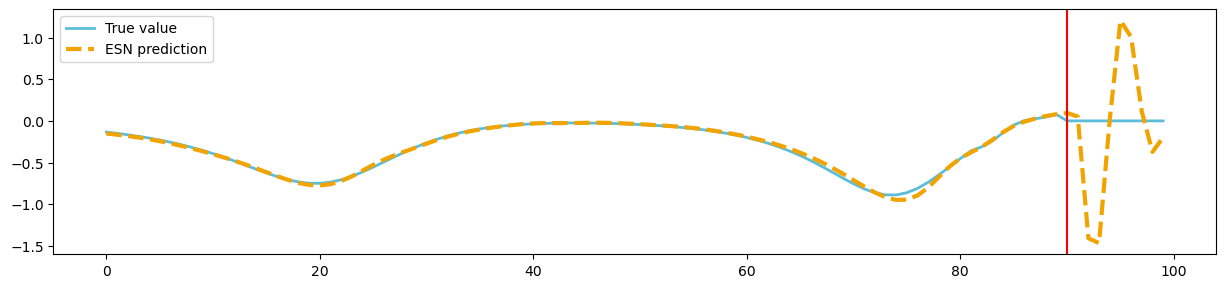

In [29]:
results(y_pred1[-100:], X[-100:])

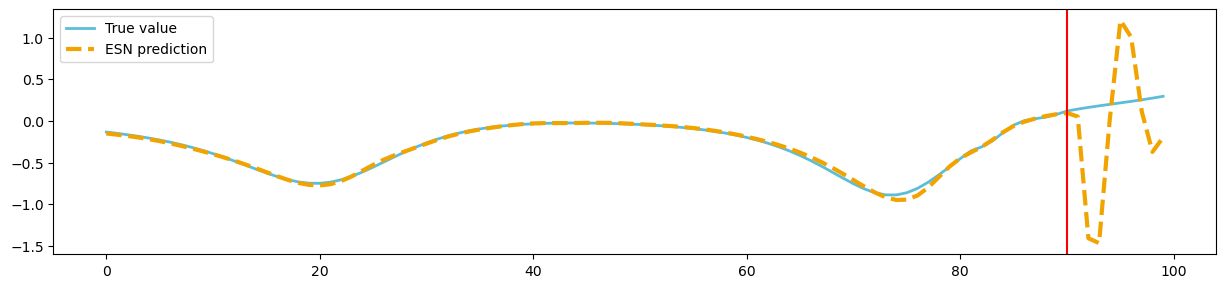

In [31]:
results(y_pred1[-100:], X1[4910:5010])

In [32]:
import numpy as np

# Создаем тестовый массив с шумом
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) + np.random.randn(10, 1) * 0.5

# Применяем фильтр скользящего среднего
window_size = 3
filtered_arr = np.convolve(arr[:, 0], np.ones(window_size)/window_size, mode='valid')

# Добавляем нулевые значения в начало и конец отфильтрованного массива
filtered_arr = np.concatenate((np.zeros(window_size//2), filtered_arr, np.zeros(window_size//2)))

# Преобразуем в нампаевский массив нужной формы
filtered_arr = filtered_arr.reshape(-1, 1)

print("Исходный массив:")
print(arr)
print("\nОтфильтрованный массив:")
print(filtered_arr)

Исходный массив:
[[ 1.47387663  2.47387663  3.47387663  4.47387663  5.47387663  6.47387663
   7.47387663  8.47387663  9.47387663 10.47387663]
 [ 0.7085504   1.7085504   2.7085504   3.7085504   4.7085504   5.7085504
   6.7085504   7.7085504   8.7085504   9.7085504 ]
 [ 0.85094547  1.85094547  2.85094547  3.85094547  4.85094547  5.85094547
   6.85094547  7.85094547  8.85094547  9.85094547]
 [ 1.04086342  2.04086342  3.04086342  4.04086342  5.04086342  6.04086342
   7.04086342  8.04086342  9.04086342 10.04086342]
 [ 1.9757427   2.9757427   3.9757427   4.9757427   5.9757427   6.9757427
   7.9757427   8.9757427   9.9757427  10.9757427 ]
 [ 0.47805557  1.47805557  2.47805557  3.47805557  4.47805557  5.47805557
   6.47805557  7.47805557  8.47805557  9.47805557]
 [ 0.38094918  1.38094918  2.38094918  3.38094918  4.38094918  5.38094918
   6.38094918  7.38094918  8.38094918  9.38094918]
 [ 1.40334173  2.40334173  3.40334173  4.40334173  5.40334173  6.40334173
   7.40334173  8.40334173  9.4033417